## Disaster Tweets Classification Using Machine Learning & NLP Approach

In [2]:
# libraries for data analysis 
import pandas as pd
import numpy as np
# libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# libraries for nlp task
import nltk, re, string
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
#machine learning
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split,cross_val_score
# for importive gdrive
# from google.colab import drive
# drive.mount('/content/drive')
# required for nlp tasks
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aniket\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aniket\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aniket\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Aniket\AppData\Roaming\nltk_data...


True

In [4]:
df=pd.read_csv("train.csv")
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


<Axes: ylabel='count'>

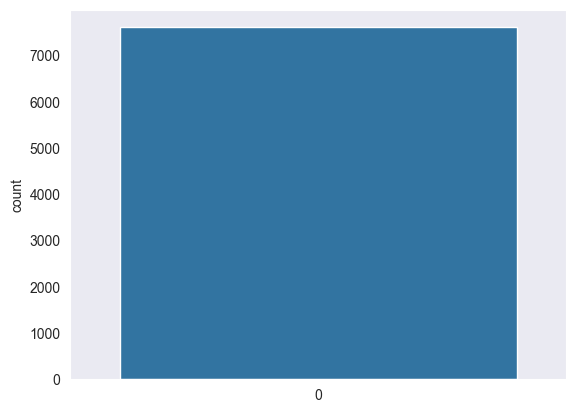

In [5]:
sns.set_style("dark")
sns.countplot(df.target)

In [6]:
# creating new column for storing length of reviews 
df['length'] = df['text'].apply(len)
df.head()

,id,keyword,location,text,target,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


In [7]:
df.length.describe()

count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: length, dtype: float64

In [8]:
df[df['length'] == 157]['text'].iloc[0]

"when you're taking a shower and someone flushes the toilet and you have .1 second to GTFO or you get burned??????????????????????????????????????????????????"

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

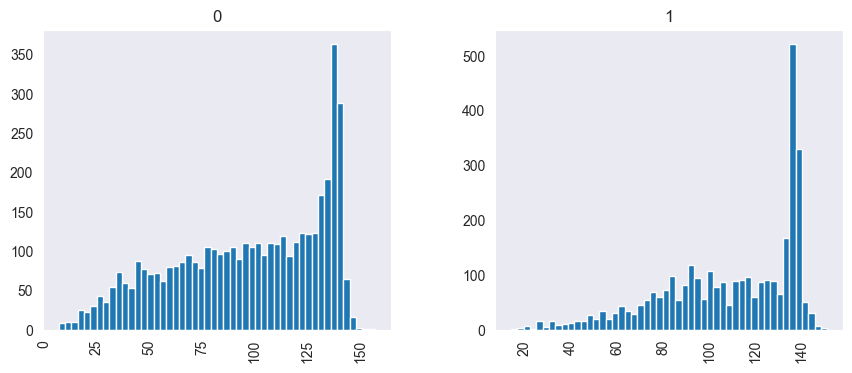

In [9]:
df.hist(column='length', by='target', bins=50,figsize=(10,4))

In [11]:
pip install wordcloud

     ------------------------------------ 300.2/300.2 kB 929.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


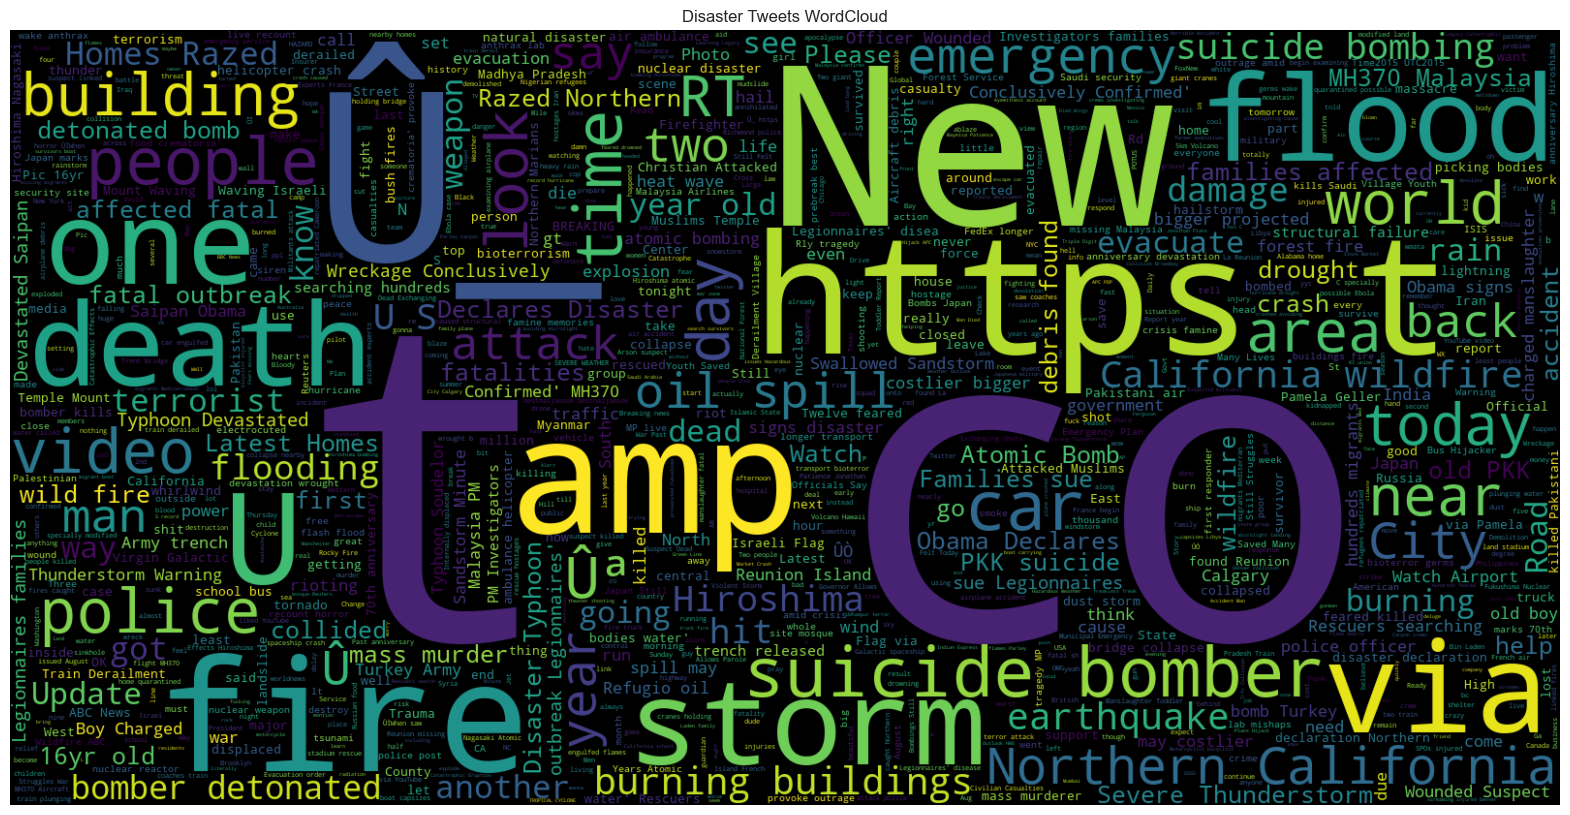

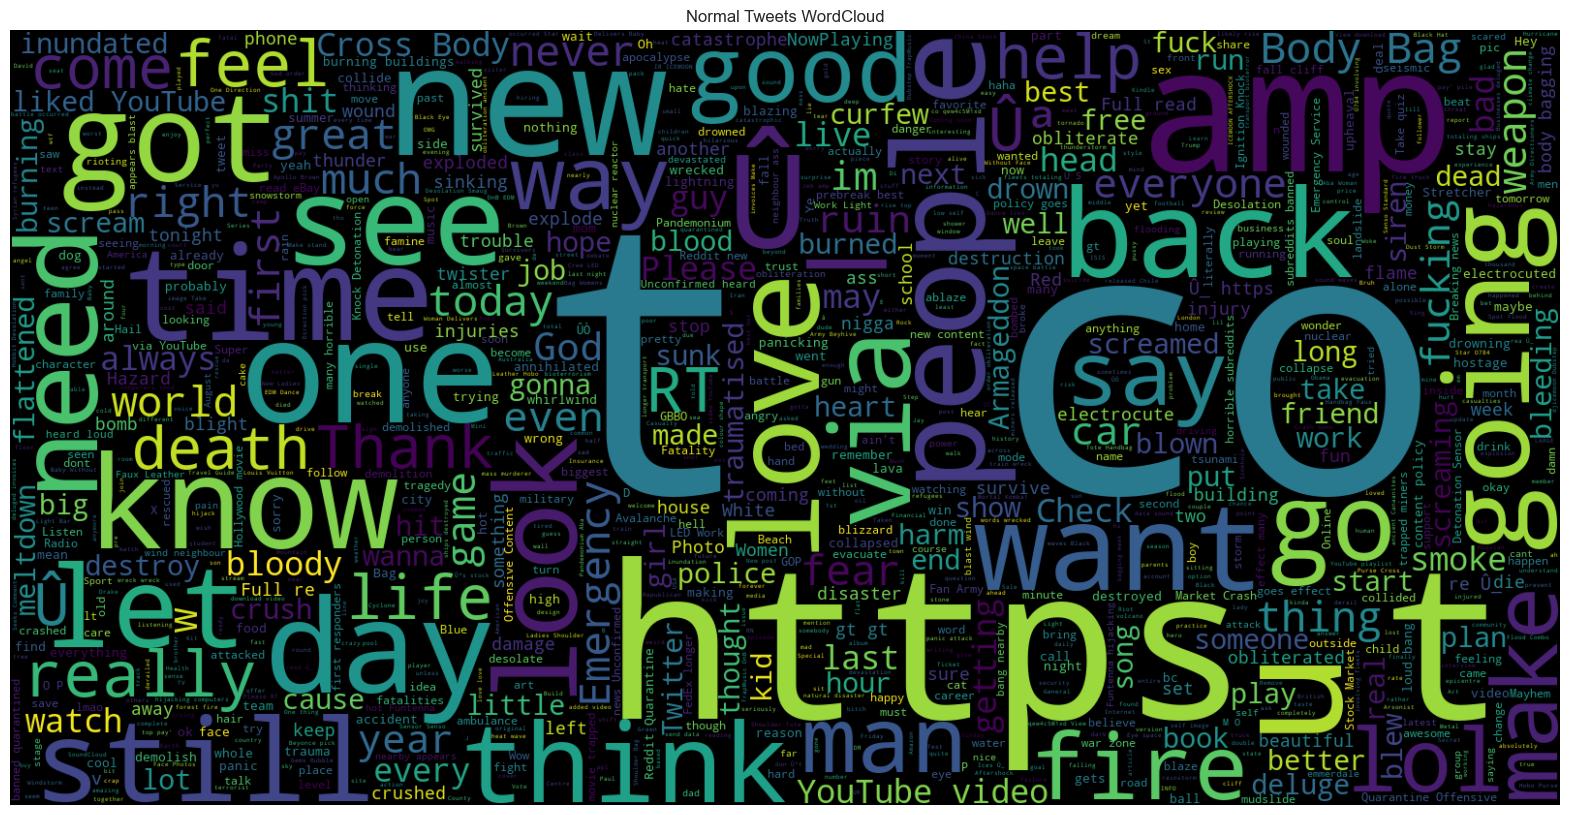

In [13]:
import pandas as pd
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming df is your original dataframe
# Segregating dataset into disaster and normal tweets dataframes
df_1 = df[df['target'] == 1].copy()
df_0 = df[df['target'] == 0].copy()

stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

# Removing stop words which are unnecessary from tweets text
def remove_stopwords(text):
    final_text = []
    for word in text.split():
        if word.strip().lower() not in stop:
            final_text.append(word.strip())
    return " ".join(final_text)

df_1['text'] = df_1['text'].apply(remove_stopwords)
df_0['text'] = df_0['text'].apply(remove_stopwords)

# Plotting disaster tweets wordcloud
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000, width=1600, height=800).generate(" ".join(df_1['text']))
plt.imshow(wc, interpolation='bilinear')
plt.title('Disaster Tweets WordCloud')
plt.axis('off')
plt.show()

# Plotting normal tweets wordcloud
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000, width=1600, height=800).generate(" ".join(df_0['text']))
plt.imshow(wc, interpolation='bilinear')
plt.title('Normal Tweets WordCloud')
plt.axis('off')
plt.show()

In [14]:
lemma = WordNetLemmatizer()
#creating list of possible stopwords from nltk library
stop = stopwords.words('english')

def cleanTweet(txt):
  # lowercaing
    txt = txt.lower()
    # tokenization
    words = nltk.word_tokenize(txt)
  # removing stopwords & mennatizing the words
    words = ' '.join([lemma.lemmatize(word) for word in words if word not in (stop)])
    text = "".join(words)
  # removing non-alphabetic characters
    txt = re.sub('[^a-z]',' ',text)
    return txt  
#applying cleantweet function on tweet text column
df['cleaned_tweets'] = df['text'].apply(cleanTweet)
df.head()

,id,keyword,location,text,target,length,cleaned_tweets
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,deed reason earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,resident asked shelter place notified offic...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,people receive wildfire evacuation or...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,got sent photo ruby alaska smoke wildfire ...


In [15]:
y = df.target
X=df.cleaned_tweets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,stratify=y, random_state=0)

In [17]:
# bigrams
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

# trigrams
tfidf_vectorizer_3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train_3 = tfidf_vectorizer_3.fit_transform(X_train)
tfidf_test_3 = tfidf_vectorizer_3.transform(X_test)

In [18]:
## Multi nomial Naive Bayes - bigram
mnb_tf_bigram = MultinomialNB()
mnb_tf_bigram .fit(tfidf_train_2, y_train)

# Passive Aggressive Classifier -bigram
pass_tf_bigram = PassiveAggressiveClassifier()
pass_tf_bigram.fit(tfidf_train_2, y_train)

## Multi nomial Naive Bayes - trigram
mnb_tf_trigram = MultinomialNB()
mnb_tf_trigram .fit(tfidf_train_3, y_train)

# Passive Aggressive Classifier -trigram
pass_tf_trigram = PassiveAggressiveClassifier()
pass_tf_trigram.fit(tfidf_train_3, y_train)

PassiveAggressiveClassifier()

In [20]:
import pandas as pd
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

In [21]:
kfold = model_selection.KFold(n_splits=10)
scoring = 'accuracy'

acc_mnb2 = cross_val_score(estimator = mnb_tf_bigram, X = tfidf_train_2, y = y_train, cv = kfold,scoring=scoring)

acc_passtf2 = cross_val_score(estimator = pass_tf_bigram, X = tfidf_train_2, y = y_train, cv = kfold,scoring=scoring)

acc_mnb3 = cross_val_score(estimator = mnb_tf_trigram, X = tfidf_train_3, y = y_train, cv = kfold,scoring=scoring)

acc_passtf3 = cross_val_score(estimator = pass_tf_trigram, X = tfidf_train_3, y = y_train, cv = kfold,scoring=scoring)

# compare the average 10-fold cross-validation accuracy
crossdict = {        
                'MNB-Bigram': acc_mnb2.mean(),
               
                'PassiveAggressive-Bigram':acc_passtf2.mean(),
               
                'MNB-Trigram': acc_mnb3.mean(), 
               
                'PassiveAggressive-Trigram': acc_passtf3.mean() }

cross_df = pd.DataFrame(crossdict.items(), columns=['Model', 'Cross-val accuracy'])
cross_df = cross_df.sort_values(by=['Cross-val accuracy'], ascending=False)
cross_df

,Model,Cross-val accuracy
0,MNB-Bigram,0.792282
3,PassiveAggressive-Trigram,0.790640
1,PassiveAggressive-Bigram,0.788342
2,MNB-Trigram,0.784565


In [22]:
pred_mnb2 = mnb_tf_bigram.predict(tfidf_test_2)

acc= accuracy_score(y_test, pred_mnb2)

prec = precision_score(y_test, pred_mnb2)
rec = recall_score(y_test, pred_mnb2)
f1 = f1_score(y_test, pred_mnb2)
roc=roc_auc_score(y_test, pred_mnb2)

model_results =pd.DataFrame([['Multinomial Naive Bayes-Bigram',acc, prec,rec,f1,roc]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity', 'F1 Score','ROC'])

model_results

,Model,Accuracy,Precision,Sensitivity,F1 Score,ROC
0,Multinomial Naive Bayes-Bigram,0.800394,0.858607,0.640673,0.7338,0.780636


In [24]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

# Predictions
y_pred_passtf2 = pass_tf_bigram.predict(tfidf_test_2)
y_pred_mnb3 = mnb_tf_trigram.predict(tfidf_test_3)
y_pred_passtf3 = pass_tf_trigram.predict(tfidf_test_3)

# Store predictions in a DataFrame
models = {        
    'PassiveAggressive-Bigram': y_pred_passtf2,
    'MNB-Trigram': y_pred_mnb3, 
    'PassiveAggressive-Trigram': y_pred_passtf3 
}

models = pd.DataFrame(models)

# Initialize an empty DataFrame to store results
model_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Sensitivity', 'F1 Score', 'ROC'])

# Calculate and store evaluation metrics for each model
for column in models:
    acc = accuracy_score(y_test, models[column])
    roc = roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])
    
    results = pd.DataFrame([[column, acc, prec, rec, f1, roc]], 
                           columns=['Model', 'Accuracy', 'Precision', 'Sensitivity', 'F1 Score', 'ROC'])
    model_results = model_results.append(results, ignore_index=True)

# Function to highlight maximum value of numeric columns
def highlight_max(s):
    if s.dtype == object:
        is_max = [False for _ in range(s.shape[0])]
    else:
        is_max = s == s.max()
    return ['background: lightgreen' if cell else '' for cell in is_max]

# Apply the highlight_max function to the DataFrame
model_results.style.apply(highlight_max)

C:\Users\Aniket\AppData\Local\Temp\ipykernel_4596\1639098946.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append(results, ignore_index=True)
C:\Users\Aniket\AppData\Local\Temp\ipykernel_4596\1639098946.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append(results, ignore_index=True)
C:\Users\Aniket\AppData\Local\Temp\ipykernel_4596\1639098946.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append(results, ignore_index=True)


,Model,Accuracy,Precision,Sensitivity,F1 Score,ROC
0,PassiveAggressive-Bigram,0.782009,0.742470,0.753823,0.748103,0.778522
1,MNB-Trigram,0.798424,0.866808,0.626911,0.727595,0.777207
2,PassiveAggressive-Trigram,0.785292,0.750383,0.749235,0.749809,0.780832


In [25]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    """
    See: https://stackoverflow.com/a/26980472
    
    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not 
    return top classes.)
    """

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names_out()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Example training data
training_sentences = [
    "This is a disaster tweet.",
    "This is a normal tweet.",
    # Add more training sentences here
]
# Create a TfidfVectorizer
tfidf_vectorizer3 = TfidfVectorizer(ngram_range=(1, 3))

# Fit the vectorizer on the training data
tfidf_train_3 = tfidf_vectorizer3.fit_transform(training_sentences)
